# Demonstration of reversibility of TDSE

Make sure you watch till the end!



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fft_tdse.psiviz import phase_mag_vis2
from PIL import Image
from fft_tdse.simulator import *
from fft_tdse.animator import *
from fft_tdse.interpolate_2d import interpolate_2d
from matplotlib import colormaps as cm


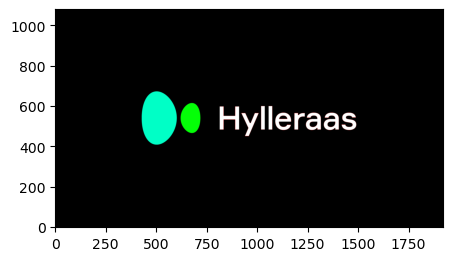

In [6]:
# read a png file to numpy array
def read_png(filename):
    im = Image.open(filename, )
    return np.array(im)

hylleraas = read_png('hylleraas_logo_hd.png')

# convert rgb image to hsv
from matplotlib.colors import rgb_to_hsv
hylleraas_hsv = rgb_to_hsv(hylleraas)

hue = hylleraas_hsv[:, :, 0]
saturation = hylleraas_hsv[:, :, 1]
value = hylleraas_hsv[:, :, 2]
psi = np.exp(1j * hue * 2 * np.pi) *  value / 255.0
psi[:,750:] *= 2 # lighten the right side, i.e., the text
# rotate 90 degrees
psi = np.rot90(psi, 3)
psi_init = psi.conj() # so that colors will be correct on the reversed simulation!

bmp = phase_mag_vis2(psi_init.T, cmap=cm['hsv'])
#bmp = phase_mag_vis2(psi.T)

plt.figure(figsize=(5, 5))
plt.imshow(bmp, origin='lower')
plt.show()

In [13]:
x_min = -16
x_max = 16
y_min = -9
y_max = 9
nx, ny = psi.shape
ic(nx, ny)

# # convert the array psi to a function psi(x, y)
# def psi_func0(x, y, psi):
#     i = int((x - x_min) / (x_max - x_min) * nx)
#     j = int((y - y_min) / (y_max - y_min) * ny)
#     return psi[i, j]

# def make_psi_func(psi):
#     temp = lambda x, y: psi_func0(x, y, psi)
    
#     return lambda x, y: np.vectorize(temp)(x, y)

grid = FourierGrid([x_min, y_min], [x_max, y_max], [nx, ny])
psi_func = interpolate_2d(psi_init.T, extent=[x_min, x_max - grid.h[0], y_min, y_max - grid.h[1]])


#psi_func = make_psi_func(psi)


def potential(x, y):
    
    # inside of an ellipse with semi-major axis a and semi-minor axis b
    # (x/a)**2 + (y/b)**2 <= 1
    a = 16 - .75
    b = 9 - .75
    gamma = 4
    mask_superellipse = (x/a)**gamma + (y/b)**gamma <= 1
    
    return 50 - 50 * mask_superellipse 





ic| nx: 1920, ny: 1080


In [14]:
t_final = 10
fps = 24
skip = 40
secs_per_unit = 1
n_steps = fps*skip*secs_per_unit*t_final
ic(n_steps/fps/skip)
dt = t_final / n_steps


sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.psi = psi.copy()
sim.set_initial_condition(psi_func)
sim.set_mass(10.0)
sim.set_potential(potential)
sim.set_grid([x_min, y_min], [x_max, y_max], [nx, ny])
sim.set_time_parameters(0.0, t_final, n_steps)
sim.prepare()




ic| n_steps/fps/skip: 10.0
ic| message: 'Dimension set to 2'
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function interpolate_2d.<locals>.<lambda> at 0x2ed8f51b0>
ic| message: 'Grid set.'
ic| self.a: array([-16.,  -9.])
    self.b: array([16.,  9.])
    self.n: array([1920, 1080])
ic| 'Time parameters set.'
ic| self.t0: 0.0, self.t1: 10, self.n_steps: 9600
ic| 'Using given initial condition function. '


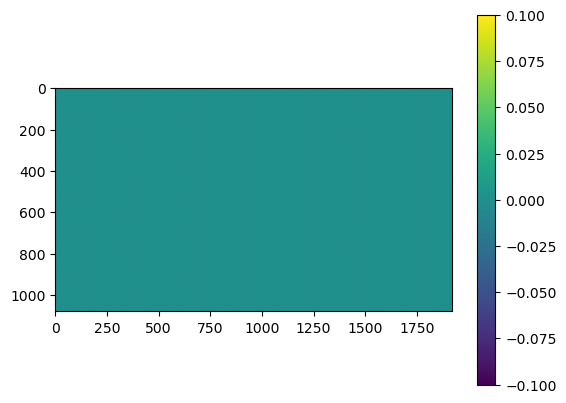

In [16]:
plt.figure()
plt.imshow(np.abs(sim.psi - psi_init).T)
plt.colorbar()
plt.show()

In [17]:

# plt.figure()
# plt.imshow(np.abs(sim.psi.T), origin='lower')
# plt.figure()
# plt.imshow(sim.ham.V.T)
# plt.show()


sim.simulate()
psi_end = sim.wf.psi.copy().conj()





ic| 'Running simulation...'


  0%|          | 0/9600 [00:00<?, ?it/s]

ic| message: 'Dimension set to 2'
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function interpolate_2d.<locals>.<lambda> at 0x2f59c9bd0>
ic| message: 'Grid set.'
ic| self.a: array([-16.,  -9.])
    self.b: array([16.,  9.])
    self.n: array([1920, 1080])
ic| 'Time parameters set.'
ic| self.t0: 0.0, self.t1: 10, self.n_steps: 9600
ic| 'Using given initial condition function. '
ic| self.name: 'hylleraas3'
ic| self.folder: './hylleraas3_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './hylleraas3_frames/frame%06d.png'
ic| self.fig_width_pixels: 1920
    self.fig_height_pixels: 1080
    self.fig_width: 10
    self.fig_height: 5.625
    self.dpi: 192.0
ic| 'inside mpl_style'
ic| animator.py:670 in get_extent() at 20:18:03.594
ic| x_range.shape: (1920,), y_range.shape: (1080,)
ic| extent: [-16.0, 15.983333333333334, -9.0, 8.983333333333334]
ic| self.caption_font: 

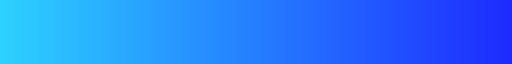

ic| animator.py:670 in get_extent() at 20:18:03.651
ic| x_range.shape: (1920,), y_range.shape: (1080,)
ic| extent: [-16.0, 15.983333333333334, -9.0, 8.983333333333334]
ic| 'Running simulation...'


  0%|          | 0/9600 [00:00<?, ?it/s]

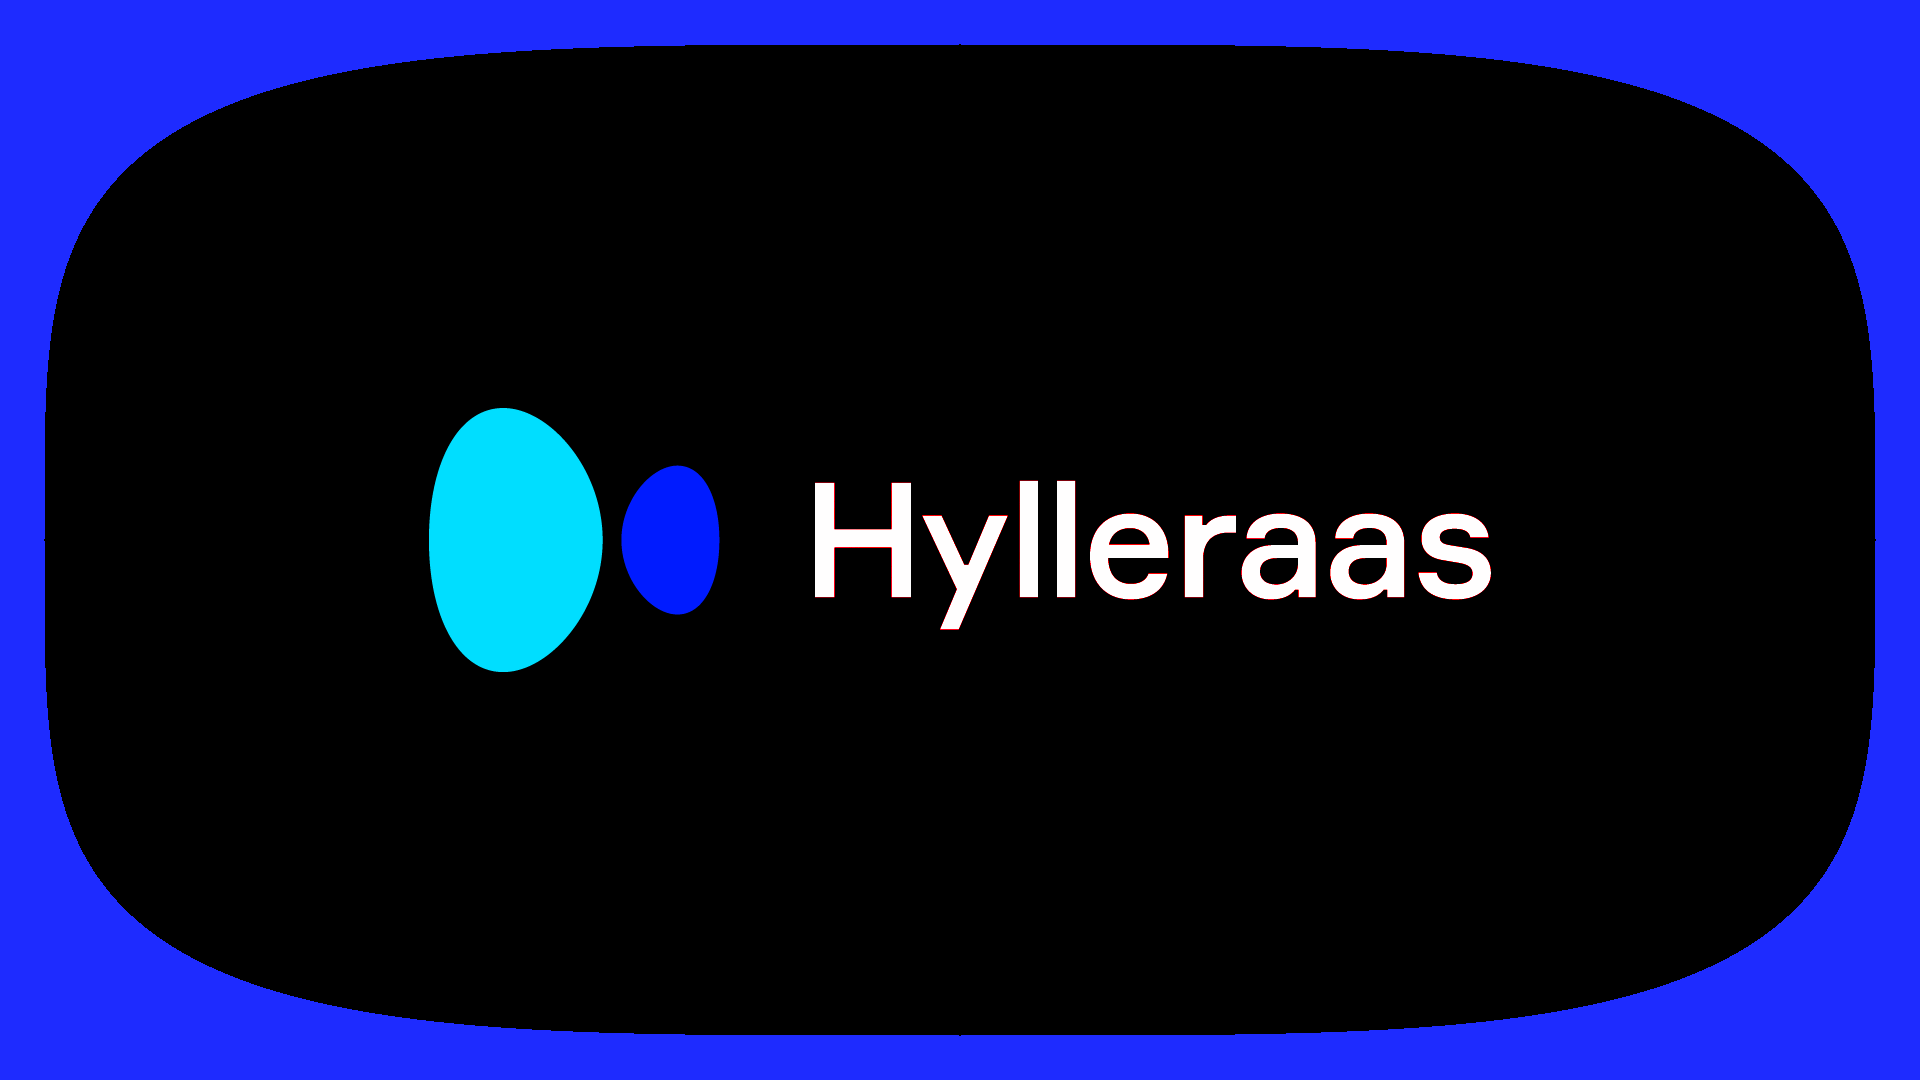

ic| len(self.frame_list): 241
ic| 'making movie ...'
ic| filename: 'hylleraas3.mp4'
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-li

In [20]:
sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_initial_condition(interpolate_2d(psi_end.T, extent=[x_min, x_max-grid.h[0], y_min, y_max-grid.h[1]]))
sim.set_mass(10.0)
sim.set_potential(potential)
sim.set_grid([x_min, y_min], [x_max, y_max], [nx, ny])
sim.set_time_parameters(0.0, t_final, n_steps)
sim.prepare()

anim = Animator2d(sim, name='hylleraas3')
anim.set_style(DarkTheme())
anim.no_scale = True 
anim.phase_cmap = cm['hsv']
anim.vis_type = 'complex'
anim.show_axis = False
anim.caption_format = '' # delete caption
anim.set_framesize(1920, 1080)
anim.set_preview(True,10)
anim.set_interval(skip)

anim.init_figure()


import matplotlib.colors as colors

def create_smooth_colormap(color1, color2, name='custom_cmap'):
    hex_colors = [color1, color2]
    rgb_colors = [colors.hex2color(color) for color in hex_colors]
    cmap = colors.LinearSegmentedColormap.from_list(name, rgb_colors)
    return cmap

# Example usage
color1 = '#2DD1FF'  # Red
color2 = '#1E2BFF'  # Blue
hylleraas_cmap = create_smooth_colormap(color1, color2)

display(hylleraas_cmap)




anim.add_potential_visualization_2d(cmap=hylleraas_cmap, transparent_range=[-10,10])

anim_callback = anim.get_callback()

sim.simulate(callback=anim_callback)
anim.make_movie(duplicate_last_frame=24)
anim.clean_frames()
anim.restore_backend()


In [6]:
# sim = Simulator(verbose=True)
# sim.set_dimension(2)
# sim.psi = psi.copy()
# sim.set_initial_condition(make_psi_func(psi_end))
# sim.set_mass(10.0)
# sim.set_potential(potential)
# sim.set_grid([x_min, y_min], [x_max, y_max], [nx, ny])
# sim.set_time_parameters(0.0, t_final, n_steps)
# sim.prepare()
# sim.simulate()

# # save the simulation result, conjugate the wave function
# # when simulated again, the wave function will be propagated back to the initial condition.
# psi2 = sim.psi.copy()

# plt.figure(figsize=(5, 5))
# plt.imshow(np.abs(psi.T)**2, origin='lower')
# plt.figure(figsize=(5, 5))
# plt.imshow(np.abs(psi_end.T)**2, origin='lower')
# plt.figure(figsize=(5, 5))
# plt.imshow(np.abs(psi2.T)**2, origin='lower')

In [24]:

anim1 = Animator2d(sim, name='hylleraas')
anim1.set_style(DarkTheme())
anim1.no_scale = True 
anim1.phase_cmap = cm.get_cmap('hsv')
anim1.vis_type = 'complex'
anim1.show_axis = False

#anim2 = Animator2d(sim, folder='./frames2/')
#anim2.vis_type = 'magnitude'
#anim2.show_axis = False

anim1.set_interval(10)
anim1.set_framesize(1024, 1024)
#anim2.set_interval(10)
#anim2.set_framesize(1024, 1024)

# initialize figure, and add potential visualization
anim1.init_figure()
anim1.add_potential_visualization_2d(cmap=cm.get_cmap('gray'), transparent_range=[-10,10])
#anim2.init_figure()
#anim2.add_potential_visualization_2d()


anim_callback1 = anim1.get_callback()
#anim_callback2 = anim2.get_callback()

anim1.make_bmp(sim.wf.psi)
anim1.restore_backend()
plt.figure(figsize=(5, 5))
plt.imshow(anim1.bmp, origin='lower')
plt.show()

ic| self.name: 'hylleraas2'
ic| self.folder: './hylleraas2_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './hylleraas2_frames/frame%06d.png'
ic| self.fig_width_pixels: 1024
    self.fig_height_pixels: 1024
    self.fig_width: 10
    self.fig_height: 10.0
    self.dpi: 102.4
ic| 'inside mpl_style'


AttributeError: 'Simulator' object has no attribute 'psi'

In [7]:


ic(np.linalg.norm(psi_end))
ic(np.linalg.norm(sim.psi))



ic| np.linalg.norm(psi_end): 405.47929343793976
ic| np.linalg.norm(sim.psi): 404.3132990354112


404.3132990354112

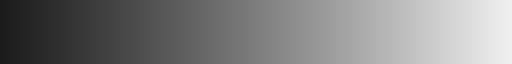

In [ ]:
display(anim1.mag_cmap)

In [ ]:
anim1.restore_backend()
bmp = phase_mag_vis2(sim.psi.T, cmap=cm.get_cmap('hsv'))
#bmp = phase_mag_vis2(psi.T)

plt.figure(figsize=(5, 5))
plt.imshow(bmp, origin='lower')
plt.show()




/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_64547/2660309824.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


sim.x.shape


In [11]:
sim.grid.x[0]

array([-16.        , -15.98333333, -15.96666667, ...,  15.95      ,
        15.96666667,  15.98333333])